In [5]:
!pip install xgboost --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.8 kB/s eta 0:00:0000:0100:02m
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.4
    Uninstalling xgboost-1.7.4:
      Successfully uninstalled xgboost-1.7.4


In [93]:
!pip3 install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.0 MB/s eta 0:00:0000:0100:010m
  Attempting uninstall: pip
    Found existing installation: pip 23.3
    Uninstalling pip-23.3:
      Successfully uninstalled pip-23.3


In [181]:
!pip install streamlit --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 2.5 MB/s eta 0:00:0000:0100:010m
  Attempting uninstall: streamlit
    Found existing installation: streamlit 1.27.0
    Uninstalling streamlit-1.27.0:
      Successfully uninstalled streamlit-1.27.0


In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
#Import dataset
laptop = pd.read_csv("laptop_price (1).csv", encoding='latin-1')

In [8]:
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [9]:
laptop.shape

(1303, 13)

In [10]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [11]:
laptop.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [12]:
#Checking for missing value
laptop.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [13]:
#Drop the ID columns
laptop = laptop.drop(columns = ['laptop_ID'])

### Exploratory Data Analysis

In [14]:
laptop.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

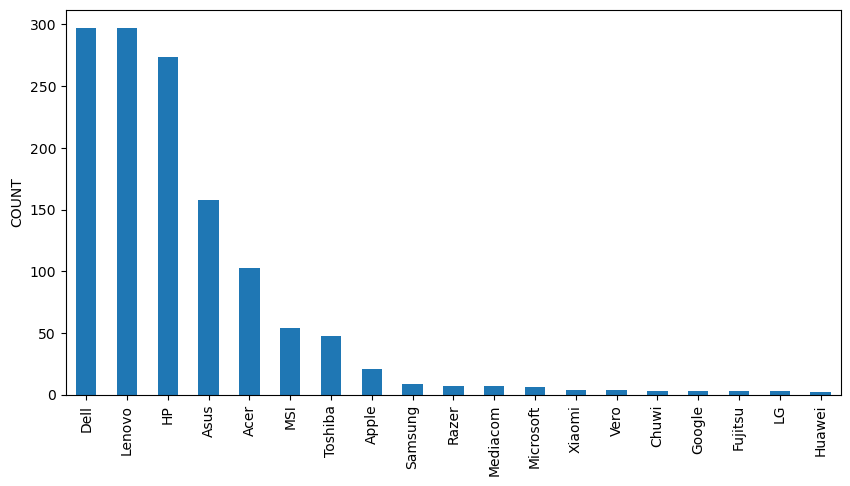

In [16]:
#Company Plot

Company = laptop.Company.value_counts()
plt.figure(figsize=(10,5))
Company.plot(kind = "bar")
plt.ylabel("COUNT")

plt.savefig("Company.png")
plt.show()

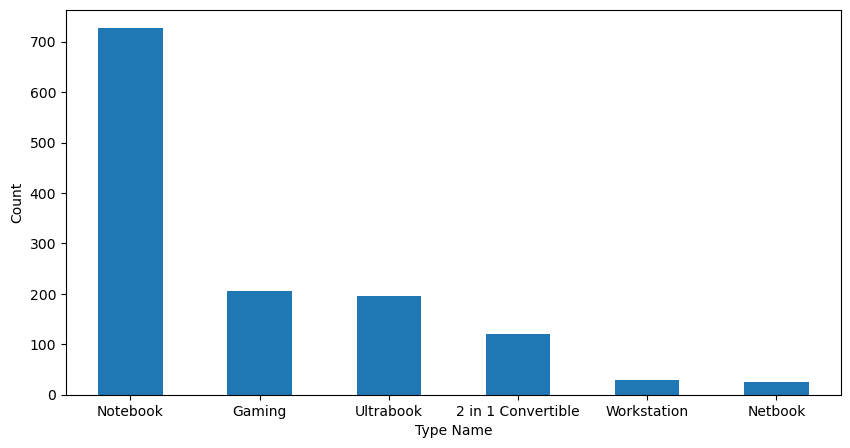

In [17]:
#Laptop type name
type_name = laptop.TypeName.value_counts()
plt.figure(figsize=(10,5))
type_name.plot(kind = "bar")
plt.ylabel("Count")
plt.xlabel("Type Name")
plt.xticks(rotation=0)

plt.savefig("type.png")
plt.show()

In [18]:
typebyprice = laptop.groupby("TypeName")["Price_euros"].mean()

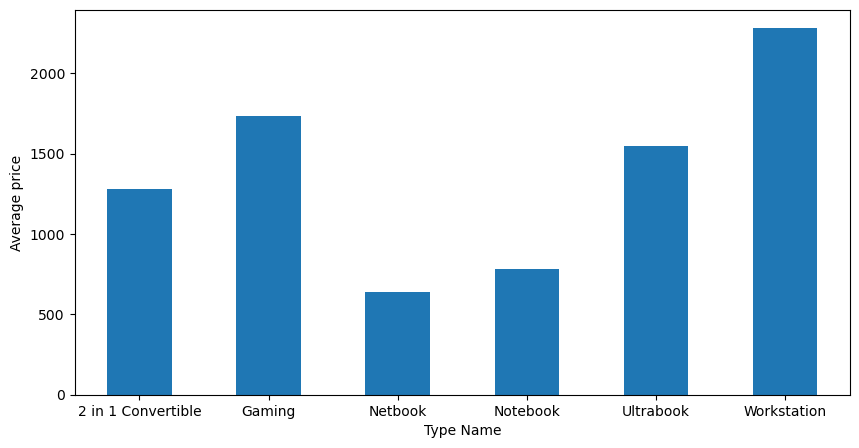

In [19]:
#Laptop type name
plt.figure(figsize=(10,5))
typebyprice.plot(kind = "bar")
plt.ylabel("Average price")
plt.xlabel("Type Name")
plt.xticks(rotation=0)

plt.savefig("type_price.png")
plt.show()

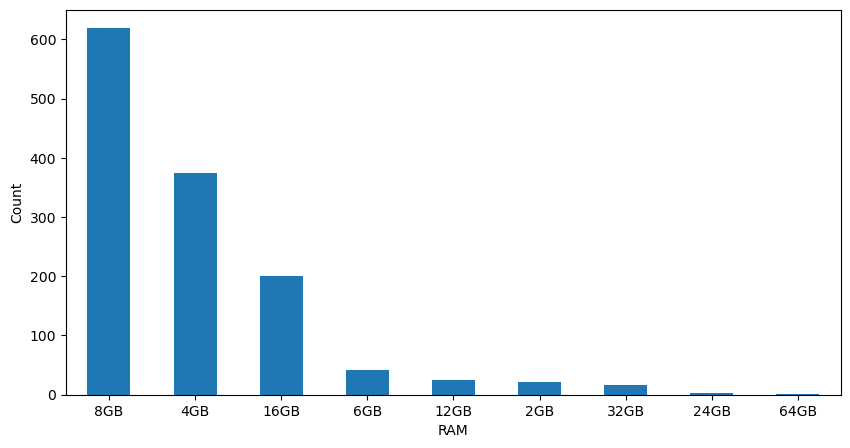

In [20]:
#Laptop RAM
Ram = laptop.Ram.value_counts()
plt.figure(figsize=(10,5))
Ram.plot(kind = "bar")
plt.ylabel("Count")
plt.xlabel("RAM")
plt.xticks(rotation=0)

plt.savefig("ram.png")
plt.show()

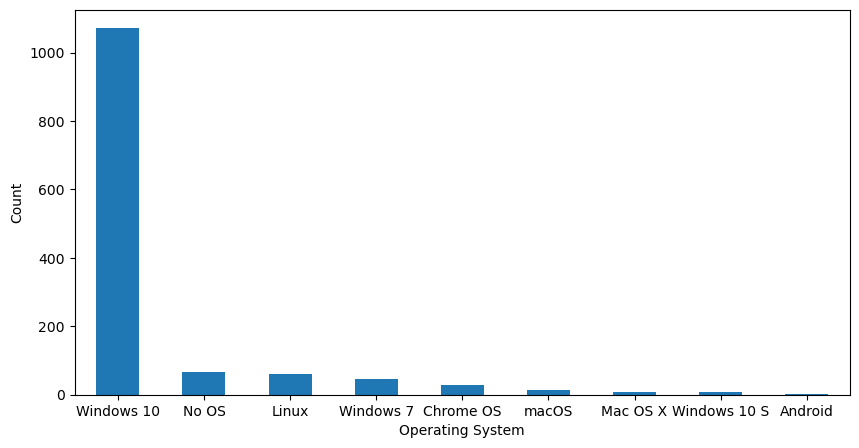

In [21]:
#Operating System
OpSys = laptop.OpSys.value_counts()
plt.figure(figsize=(10,5))
OpSys.plot(kind = "bar")
plt.ylabel("Count")
plt.xlabel("Operating System")
plt.xticks(rotation=0)

plt.savefig("Os.png")
plt.show()

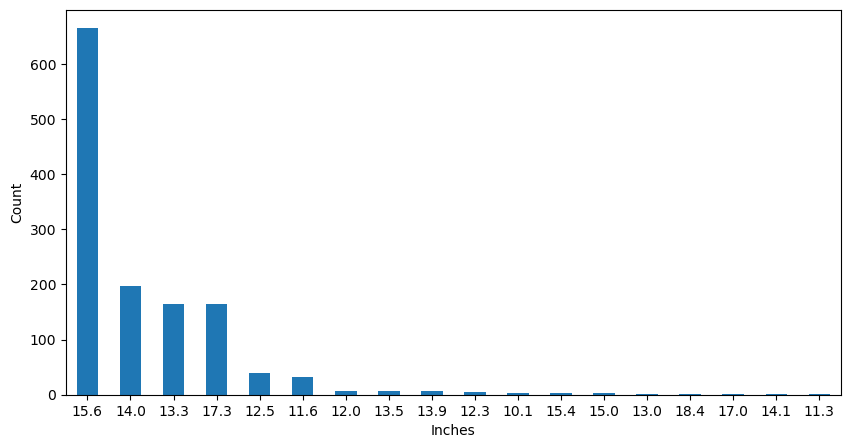

In [22]:
#Laptop Inches
Inches = laptop.Inches.value_counts()
plt.figure(figsize=(10,5))
Inches.plot(kind = "bar")
plt.ylabel("Count")
plt.xlabel("Inches")

plt.xticks(rotation=0)
plt.savefig("INCHES.png")
plt.show()

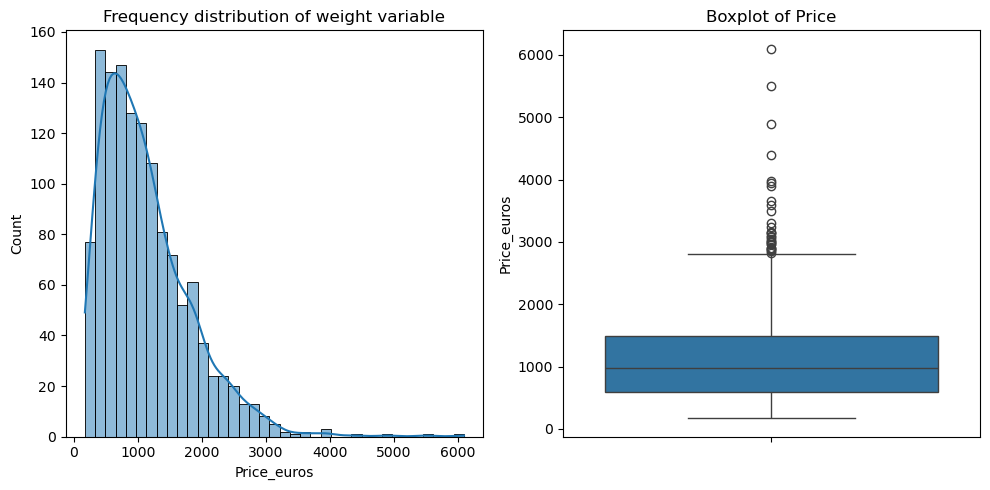

In [23]:
fig, ax = plt.subplots(1, 2, figsize= (10, 5))

ax1 = sns.histplot(data= laptop, x= 'Price_euros', kde= True, ax= ax[0])
ax1.set_title('Frequency distribution of weight variable')
ax2 = sns.boxplot(data=  laptop, y= 'Price_euros', ax= ax[1])
ax2.set_title('Boxplot of Price')
plt.tight_layout()
plt.savefig("price.png")
plt.show()

### Data Cleaning

In [24]:
laptop.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

In [25]:
laptop.head(1)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69


In [26]:
# Remove of "GB" characters:

laptop['Ram'] = laptop['Ram'].str.replace('GB', '')

In [27]:
# Convert of data for integer type:

laptop['Ram'] = laptop['Ram'].astype(int)

In [28]:
# Remove of "kg" character:

laptop['Weight'] = laptop['Weight'].str.replace('kg', '')

In [29]:
# The weight values are converted to float type:

laptop['Weight'] = laptop['Weight'].astype(float)

<AxesSubplot:>

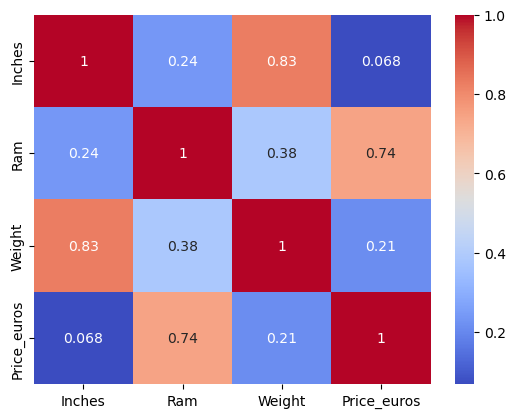

In [30]:
sns.heatmap(data= laptop.corr(numeric_only= True), annot= True, cmap= 'coolwarm')

### Modelling

In [31]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm

In [32]:
vif = pd.DataFrame()
X = laptop[['Inches', 'Weight']] # only numeric variables.
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

  Variable        VIF
0   Inches  17.308048
1   Weight  17.308048


In [33]:
encoders_col = TargetEncoder(
    cols= ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu',
        'Memory', 'Gpu', 'OpSys'])

In [34]:
#replicating the data in two for feature engineering and EDA
laptop1 = laptop.copy()
laptop2 = laptop.copy()

In [35]:
# Setting features (X) and target (y):

X = laptop1.drop(['Price_euros'], axis= 1)
y = laptop1['Price_euros']

# Splitting in train and test with test size at 30%:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [36]:
# Encoding X train data:

X_train = encoders_col.fit_transform(X_train, y_train)

# Encoding X test data:

X_test = encoders_col.transform(X_test)

In [37]:
X_train.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
10,1068.984558,814.408469,772.223972,15.6,535.924616,910.556244,4,621.664335,1155.233513,601.401696,1.86
147,1084.482502,1026.294818,772.223972,15.6,1137.184670,663.219396,4,660.839958,546.117930,1172.867741,2.00
1287,1068.984558,1072.066110,772.223972,15.6,535.924616,1275.879346,6,660.839958,1046.811387,1172.867741,2.19
767,1227.100961,1108.579226,1723.960451,15.6,1205.865651,1576.313447,16,1240.511051,1125.891090,1172.867741,2.72
816,1476.301001,1168.865219,1563.751327,12.5,1356.179859,1215.602648,16,1898.788597,1155.233513,1172.867741,1.29


In [38]:
# Log transformation of X_train and X_test:

X_train = np.log(X_train)
X_test = np.log(X_test)
# Log transformation of y_train and y_test:

y_train = np.log(y_train)
y_test = np.log(y_test)

In [ ]:
!pip install lazypredict

In [ ]:
import lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 76%|███████▌  | 32/42 [00:07<00:02,  3.84it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:09<00:00,  4.23it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
KNeighborsRegressor                          0.81       0.82  0.25        0.08
SVR                                          0.79       0.80  0.26        0.09
SGDRegressor                                 0.79       0.80  0.27        0.08
PoissonRegressor                             0.79       0.80  0.27        0.07
RidgeCV                                      0.79       0.80  0.27        0.09
BayesianRidge                                0.79       0.80  0.27        0.08
Ridge                                        0.79       0.80  0.27        0.04
TransformedTargetRegressor                   0.79       0.80  0.27        0.04
LinearRegression                             0.79       0.80  0.27        0.08
Lars                                         0.79       0.80  0.27        0.07
LassoLarsIC                                  0.79   

In [129]:
from sklearn.neighbors import KNeighborsRegressor

### Method 2

In [39]:
laptop2.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [40]:
# converting type of columns to 'category'
# Assigning numerical values and storing in another column
laptop2['Company'] = laptop2['Company'].astype('category').cat.codes


In [41]:
laptop2['Product'] = laptop2['Product'].astype('category').cat.codes
laptop2['TypeName'] = laptop2['TypeName'].astype('category').cat.codes
laptop2['ScreenResolution'] = laptop2['ScreenResolution'].astype('category').cat.codes
laptop2['Cpu'] = laptop2['Cpu'].astype('category').cat.codes
laptop2['Memory'] = laptop2['Memory'].astype('category').cat.codes
laptop2['Gpu'] = laptop2['Gpu'].astype('category').cat.codes
laptop2['OpSys'] = laptop2['OpSys'].astype('category').cat.codes

In [42]:
laptop2

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,23,65,8,4,58,8,1.37,1339.69
1,1,301,4,13.3,1,63,8,2,51,8,1.34,898.94
2,7,50,3,15.6,8,74,8,16,53,4,1.86,575.00
3,1,300,4,15.4,25,85,16,29,9,8,1.83,2537.45
4,1,300,4,13.3,23,67,8,16,59,8,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,580,0,14.0,13,89,4,4,47,5,1.80,638.00
1299,10,588,0,13.3,19,89,16,29,47,5,1.30,1499.00
1300,10,196,3,14.0,0,34,2,35,40,5,1.50,229.00
1301,7,2,3,15.6,0,89,6,10,21,5,2.19,764.00


In [43]:
# Setting features (X) and target (y):

X = laptop2.drop(['Price_euros'], axis= 1)
y = laptop2['Price_euros']

# Splitting in train and test with test size at 30%:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [44]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()


X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [45]:
# Log transformation of y_train and y_test:

y_train = np.log(y_train)
y_test = np.log(y_test)

In [ ]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 76%|███████▌  | 32/42 [00:07<00:02,  3.94it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:10<00:00,  4.16it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
XGBRegressor                                 0.91       0.92  0.17        0.23
HistGradientBoostingRegressor                0.90       0.90  0.19        0.34
LGBMRegressor                                0.90       0.90  0.19        0.64
ExtraTreesRegressor                          0.89       0.90  0.19        0.38
RandomForestRegressor                        0.89       0.89  0.19        0.57
GradientBoostingRegressor                    0.88       0.89  0.20        0.26
BaggingRegressor                             0.87       0.88  0.21        0.07
SVR                                          0.83       0.83  0.24        0.10
NuSVR                                        0.82       0.83  0.24        0.20
AdaBoostRegressor                            0.80       0.81  0.26        0.14
DecisionTreeRegressor                        0.77   

### Method 3

### Method 4

In [46]:
laptop4 = laptop.copy()

In [47]:
laptop4.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


<AxesSubplot:xlabel='TouchScreen', ylabel='Price_euros'>

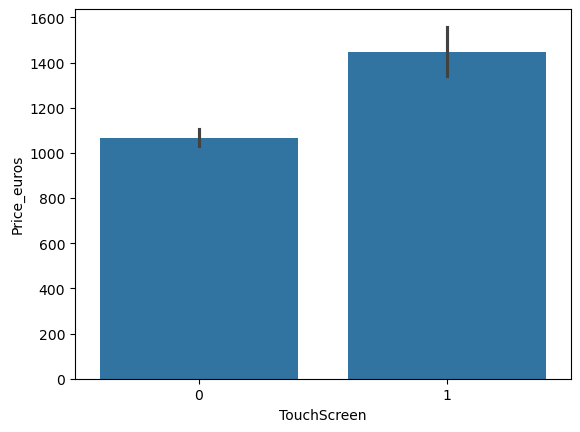

In [48]:
#TouchScreen feature extraction
laptop4['TouchScreen'] = laptop4['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

#Plot against price
sns.barplot(x=laptop4['TouchScreen'],y=laptop4['Price_euros'])

<AxesSubplot:xlabel='Ips', ylabel='Price_euros'>

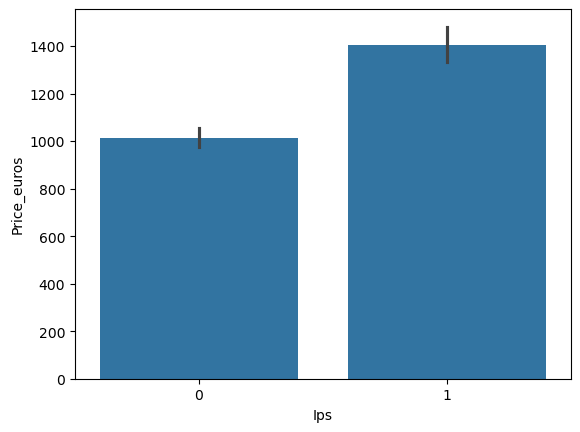

In [49]:
#Extract IPS column
laptop4['Ips'] = laptop4['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
sns.barplot(x=laptop4['Ips'],y=laptop4['Price_euros'])

In [50]:
##Extract X-axis and Y-axis screen resolution dimensions
def X_resolution(s):
  return s.split()[-1].split("x")[0]
def Y_resolution(s):
  return s.split()[-1].split("x")[1]
#finding the x_res and y_res from screen resolution
laptop4['X_res'] = laptop4['ScreenResolution'].apply(lambda x: X_resolution(x))
laptop4['Y_res'] = laptop4['ScreenResolution'].apply(lambda y: Y_resolution(y))
#convert to numeric
laptop4['X_res'] = laptop4['X_res'].astype('int')
laptop4['Y_res'] = laptop4['Y_res'].astype('int')

In [51]:
laptop4.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [52]:
#Replacing inches, X and Y resolution to PPI
laptop4['ppi'] = (((laptop4['X_res']**2) + (laptop4['Y_res']**2))**0.5/laptop4['Inches']).astype('float')

In [53]:
#We extract Name of CPU which is first 3 words from Cpu column and then we will check which processor it is
def fetch_processor(x):
  cpu_name = " ".join(x.split()[0:3])
  if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
    return cpu_name
  elif cpu_name.split()[0] == 'Intel':
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'
laptop4['Cpu_brand'] = laptop4['Cpu'].apply(lambda x: fetch_processor(x))

In [54]:
#Memory type, we classify it into four (HHD, SSD, Flash storage, and hybrid)
laptop4['Memory'] = laptop4['Memory'].astype(str).replace('.0', '', regex=True)
laptop4["Memory"] = laptop4["Memory"].str.replace('GB', '')
laptop4["Memory"] = laptop4["Memory"].str.replace('TB', '000')
new = laptop4["Memory"].str.split("+", n = 1, expand = True)
laptop4["first"]= new[0]
laptop4["first"]=laptop4["first"].str.strip()
laptop4["second"]= new[1]
# laptop4['Memory'] = laptop4['Memory'].astype(str).replace(['.0', 'GB', 'TB'], ['', '', '000'], regex=True)
# laptop4[['first', 'second']] = laptop4['Memory'].str.split('+', n=1, expand=True)
# laptop4['first'] = laptop4['first'].str.replace('D', '').str.extract('(\d+)').astype(float)
# laptop4['second'] = laptop4['second'].str.replace('D', '').fillna(0).str.extract('(\d+)').astype(float)

laptop4["Layer1HDD"] = laptop4["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop4["Layer1SSD"] = laptop4["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop4["Layer1Hybrid"] = laptop4["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop4["Layer1Flash_Storage"] = laptop4["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
laptop4['first'] = laptop4['first'].str.replace(r'SSD', '')
laptop4['first'] = laptop4['first'].str.replace(r'HDD', '')
laptop4['first'] = laptop4['first'].str.replace(r'Flash Storage', '')
laptop4['first'] = laptop4['first'].str.replace(r'Hybrid', '')
#laptop4['first'] = laptop4['first'].str.replace('D', '').str.extract('(\d+)').astype(float)
laptop4['first'].fillna("0", inplace = True)
laptop4["second"].fillna("0", inplace = True)
laptop4["Layer2HDD"] = laptop4["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop4["Layer2SSD"] = laptop4["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop4["Layer2Hybrid"] = laptop4["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop4["Layer2Flash_Storage"] = laptop4["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
# laptop4['second'] = laptop4['second'].str.replace(r'DHSFlash Storage', '')
laptop4['second'] = laptop4['second'].str.replace(r'SSD', '')
laptop4['second'] = laptop4['second'].str.replace(r'HDD', '')
laptop4['second'] = laptop4['second'].str.replace(r'Flash Storage', '')
laptop4['second'] = laptop4['second'].str.replace(r'Hybrid', '')
# laptop4['second'] = laptop4['second'].str.replace(r'DHS', '')
#laptop4['second'] = laptop4['second'].str.replace('D', '').fillna(0).str.extract('(\d+)').astype(float)
laptop4["first"] = laptop4["first"].astype(int)
laptop4["second"] = laptop4["second"].astype(int)
laptop4["HDD"]=(laptop4["first"]*laptop4["Layer1HDD"]+laptop4["second"]*laptop4["Layer2HDD"])
laptop4["SSD"]=(laptop4["first"]*laptop4["Layer1SSD"]+laptop4["second"]*laptop4["Layer2SSD"])
laptop4["Hybrid"]=(laptop4["first"]*laptop4["Layer1Hybrid"]+laptop4["second"]*laptop4["Layer2Hybrid"])
laptop4["Flash_Storage"]=(laptop4["first"]*laptop4["Layer1Flash_Storage"]+laptop4["second"]*laptop4["Layer2Flash_Storage"])
laptop4.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'], inplace=True)

In [55]:
laptop4

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,TouchScreen,Ips,X_res,Y_res,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,...,0,1,2560,1600,226.983005,Intel Core i5,0,128,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,...,0,0,1440,900,127.677940,Intel Core i5,0,0,0,128
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,...,0,0,1920,1080,141.211998,Intel Core i5,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,...,0,1,2880,1800,220.534624,Intel Core i7,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,...,0,1,2560,1600,226.983005,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,...,1,1,1920,1080,157.350512,Intel Core i7,0,128,0,0
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,...,1,1,3200,1800,276.053530,Intel Core i7,0,512,0,0
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,Windows 10,...,0,0,1366,768,111.935204,Other Intel Processor,0,0,0,64
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1000 HDD,AMD Radeon R5 M330,Windows 10,...,0,0,1366,768,100.454670,Intel Core i7,1000,0,0,0


In [56]:

# Which brand GPU is in laptop
laptop4['Gpu_brand'] = laptop4['Gpu'].apply(lambda x:x.split()[0])
#there is only 1 row of ARM GPU so remove it
laptop4 = laptop4[laptop4['Gpu_brand'] != 'ARM']
laptop4.drop(columns=['Gpu'],inplace=True)

/var/folders/zy/b_pjm58j0h1472081v146p_00000gn/T/ipykernel_8802/3340936648.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop4.drop(columns=['Gpu'],inplace=True)


In [57]:
#Get which OP sys
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
laptop4['os'] = laptop4['OpSys'].apply(cat_os)
laptop4.drop(columns=['OpSys'],inplace=True)

/var/folders/zy/b_pjm58j0h1472081v146p_00000gn/T/ipykernel_8802/726663539.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop4['os'] = laptop4['OpSys'].apply(cat_os)
/var/folders/zy/b_pjm58j0h1472081v146p_00000gn/T/ipykernel_8802/726663539.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop4.drop(columns=['OpSys'],inplace=True)


In [58]:
laptop4.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Weight,Price_euros,...,X_res,Y_res,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand,os
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,1.37,1339.69,...,2560,1600,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,1.34,898.94,...,1440,900,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,1.86,575.00,...,1920,1080,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,1.83,2537.45,...,2880,1800,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,1.37,1803.60,...,2560,1600,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


In [59]:
laptop4.drop(columns=['ScreenResolution','Hybrid','Flash_Storage','Memory','Cpu','Product'],inplace=True)

/var/folders/zy/b_pjm58j0h1472081v146p_00000gn/T/ipykernel_8802/3163824344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop4.drop(columns=['ScreenResolution','Hybrid','Flash_Storage','Memory','Cpu','Product'],inplace=True)


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor

In [61]:
X_train

array([[ 0.12923572, -1.49121074,  0.32389985, ..., -0.05148254,
        -0.75489424, -0.24847391],
       [-1.08613993,  1.40374748,  0.32389985, ..., -0.5171493 ,
         0.18265022, -0.03854622],
       [ 0.12923572, -1.76637509,  0.32389985, ..., -1.54161618,
         0.18265022,  0.24635564],
       ...,
       [ 0.12923572,  0.07951906,  0.32389985, ..., -1.16908277,
         0.18265022,  0.02143312],
       [ 0.85846111,  0.83622101,  0.32389985, ..., -0.05148254,
         0.18265022,  0.41129883],
       [ 0.85846111,  1.61585333, -2.09837509, ..., -0.61028266,
         0.18265022, -2.00286962]])

In [62]:
laptop4['Company'] = laptop4['Company'].astype('category').cat.codes
laptop4['TypeName'] = laptop4['TypeName'].astype('category').cat.codes
laptop4['Cpu_brand'] = laptop4['Cpu_brand'].astype('category').cat.codes
laptop4['Gpu_brand'] = laptop4['Gpu_brand'].astype('category').cat.codes
laptop4['os'] = laptop4['os'].astype('category').cat.codes

/var/folders/zy/b_pjm58j0h1472081v146p_00000gn/T/ipykernel_8802/3145406443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop4['Company'] = laptop4['Company'].astype('category').cat.codes
/var/folders/zy/b_pjm58j0h1472081v146p_00000gn/T/ipykernel_8802/3145406443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop4['TypeName'] = laptop4['TypeName'].astype('category').cat.codes
/var/folders/zy/b_pjm58j0h1472081v146p_00000gn/T/ipykernel_8802/3145406443.py:3: SettingWithCopyWarning: 
A value is t

In [63]:
X = laptop4.drop(columns=['Price_euros'])

y = np.log(laptop4['Price_euros'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [64]:
# step1 = ColumnTransformer(transformers=[

# ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,10,13,14])

# ],remainder='passthrough')

# step2 = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

# pipe = Pipeline([

# ('step1',step1),

# ('step2',step2)

# ])

# models, predictions = pipe.fit(X_train, X_test, y_train, y_test)

# # y_pred = pipe.predict(X_test)

# # print('R2 score',r2_score(y_test,y_pred))

# # print('MAE',mean_absolute_error(y_test,y_pred))
# print(models)

In [65]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()


X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [66]:
# import optuna
import xgboost

In [67]:
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1, 1000)
    }
    model = xgboost.XGBRegressor(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

In [68]:
# # Create the study
# study = optuna.create_study(direction='minimize', study_name='regression')
# study.optimize(objective, n_trials=1000)

In [69]:
# print('Best parameters', study.best_params)

In [70]:
param = {'max_depth': 6, 'learning_rate': 0.11078261366447759, 'n_estimators': 845, 'min_child_weight': 6, 'gamma': 0.034098744007015847, 'subsample': 0.47949693221640305, 'colsample_bytree': 0.15278536403470727, 'reg_alpha': 0.09228509750817324, 'reg_lambda': 0.8621489154060421, 'random_state': 724}

In [71]:
model = xgboost.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.20399876175648365

In [72]:
print(f"R Square value {r2_score(y_test, y_pred)}")
print(f"Mean Absolute error {mean_absolute_error(y_test, y_pred)}")

R Square value 0.8919901931004622
Mean Absolute error 0.14546715500431914


In [73]:
X_train

array([[-1.10100151,  0.33372261,  0.41952386, ..., -0.9885154 ,
        -0.243945  ,  0.37977977],
       [ 0.12508169,  0.33372261,  0.41952386, ..., -0.9885154 ,
         1.30451078,  0.37977977],
       [ 0.12508169,  0.33372261, -0.69261834, ..., -0.9885154 ,
        -0.243945  ,  0.37977977],
       ...,
       [-0.61056823,  0.33372261,  0.41952386, ..., -0.9885154 ,
        -1.79240078, -2.06065689],
       [ 0.8607316 ,  0.33372261,  0.41952386, ..., -0.9885154 ,
        -0.243945  ,  0.37977977],
       [ 0.8607316 , -2.10136085, -3.40346496, ..., -0.9885154 ,
        -0.243945  ,  0.37977977]])

In [74]:
y_train = y_train.to_numpy()

In [75]:
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import KFold

In [76]:

# Initialize KNeighborsRegressor
model = KNeighborsRegressor()

# Set the number of folds for cross-validation
num_folds = 5

# Initialize KFold with 'num_folds' folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store RMSE and R-squared for each fold
rmse_list = []
r2_list = []
mae_list = []

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Fit the model
    model.fit(X_train_fold, y_train_fold)

    # Predict on the validation set
    y_val_pred = model.predict(X_val_fold)

    # Calculate RMSE for this fold
    rmse_fold = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
    rmse_list.append(rmse_fold)

    # Calculate R-squared for this fold
    r2_fold = r2_score(y_val_fold, y_val_pred)
    r2_list.append(r2_fold)
       
    # Calculate MAE for this fold
    mae_fold = mean_absolute_error(y_val_fold, y_val_pred)
    mae_list.append(mae_fold)

# Print the RMSE and R-squared for each fold
for i in range(num_folds):
    print(f"Fold {i+1}: RMSE = {rmse_list[i]:.4f}, R-squared = {r2_list[i]:.4f}")
    
# Print the MAE for each fold
for i in range(num_folds):
    print(f"Fold {i+1}: MAE = {mae_list[i]:.4f}")

# Calculate the average MAE across all folds
average_mae = np.mean(mae_list)
print("Average MAE:", average_mae)

# Calculate the average RMSE and R-squared across all folds
average_rmse = np.mean(rmse_list)
average_r2 = np.mean(r2_list)
print("Average RMSE:", average_rmse)
print("Average R-squared:", average_r2)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate RMSE and R-squared on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("MAE on the test set:", test_mae)
print("RMSE on the test set:", test_rmse)
print("R-squared on the test set:", test_r2)



Fold 1: RMSE = 0.2574, R-squared = 0.8127
Fold 2: RMSE = 0.2631, R-squared = 0.7996
Fold 3: RMSE = 0.3000, R-squared = 0.7912
Fold 4: RMSE = 0.2767, R-squared = 0.8086
Fold 5: RMSE = 0.2929, R-squared = 0.7923
Fold 1: MAE = 0.1960
Fold 2: MAE = 0.2075
Fold 3: MAE = 0.2204
Fold 4: MAE = 0.2045
Fold 5: MAE = 0.2261
Average MAE: 0.21091021589738954
Average RMSE: 0.27800887185572076
Average R-squared: 0.8008715014640024
MAE on the test set: 0.2117465287728088
RMSE on the test set: 0.28207285926544634
R-squared on the test set: 0.7934949252558163


In [77]:

# Initialize RandomForestRegressor
forest = RandomForestRegressor()

# Lists to store RMSE and R-squared for each fold
rmse_list = []
r2_list = []
mae_list = []

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Fit the model
    forest.fit(X_train_fold, y_train_fold)

    # Predict on the validation set
    y_val_pred = model.predict(X_val_fold)

    # Calculate RMSE for this fold
    rmse_fold = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
    rmse_list.append(rmse_fold)

    # Calculate R-squared for this fold
    r2_fold = r2_score(y_val_fold, y_val_pred)
    r2_list.append(r2_fold)
    
    # Calculate MAE for this fold
    mae_fold = mean_absolute_error(y_val_fold, y_val_pred)
    mae_list.append(mae_fold)

# Print the RMSE and R-squared for each fold
for i in range(num_folds):
    print(f"Fold {i+1}: RMSE = {rmse_list[i]:.4f}, R-squared = {r2_list[i]:.4f}, MAE = {mae_list[i]:.4f}")
    
    
    
# Print the MAE for each fold
for i in range(num_folds):
    print(f"Fold {i+1}: MAE = {mae_list[i]:.4f}")

# Calculate the average MAE across all folds
average_mae = np.mean(mae_list)
print("Average MAE:", average_mae)

# Calculate the average RMSE and R-squared across all folds
average_rmse = np.mean(rmse_list)
average_r2 = np.mean(r2_list)
print("Average RMSE:", average_rmse)
print("Average R-squared:", average_r2)

# Predict on the test set
y_test_pred = forest.predict(X_test)

# Calculate RMSE and R-squared on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("MAE on the test set:", test_mae)
print("RMSE on the test set:", test_rmse)
print("R-squared on the test set:", test_r2)





Fold 1: RMSE = 0.2100, R-squared = 0.8754, MAE = 0.1642
Fold 2: RMSE = 0.2123, R-squared = 0.8695, MAE = 0.1589
Fold 3: RMSE = 0.2414, R-squared = 0.8648, MAE = 0.1731
Fold 4: RMSE = 0.2100, R-squared = 0.8897, MAE = 0.1600
Fold 5: RMSE = 0.2929, R-squared = 0.7923, MAE = 0.2261
Fold 1: MAE = 0.1642
Fold 2: MAE = 0.1589
Fold 3: MAE = 0.1731
Fold 4: MAE = 0.1600
Fold 5: MAE = 0.2261
Average MAE: 0.1764532801232555
Average RMSE: 0.23330735685588966
Average R-squared: 0.8583388654732149
MAE on the test set: 0.17230166823653148
RMSE on the test set: 0.22738767352642036
R-squared on the test set: 0.8658032606824646


In [78]:
# Initialize GradientBoostingRegressor
grad = GradientBoostingRegressor()

# Set the number of folds for cross-validation
num_folds = 5

# Initialize KFold with 'num_folds' folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store RMSE and R-squared for each fold
rmse_list = []
r2_list = []
mae_list = []

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Fit the model
    grad.fit(X_train_fold, y_train_fold)

    # Predict on the validation set
    y_val_pred = model.predict(X_val_fold)

    # Calculate RMSE for this fold
    rmse_fold = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
    rmse_list.append(rmse_fold)

    # Calculate R-squared for this fold
    r2_fold = r2_score(y_val_fold, y_val_pred)
    r2_list.append(r2_fold)
    
    # Calculate MAE for this fold
    mae_fold = mean_absolute_error(y_val_fold, y_val_pred)
    mae_list.append(mae_fold)

# Print the RMSE and R-squared for each fold
for i in range(num_folds):
    print(f"Fold {i+1}: RMSE = {rmse_list[i]:.4f}, R-squared = {r2_list[i]:.4f}")
    
    
# Print the MAE for each fold
for i in range(num_folds):
    print(f"Fold {i+1}: MAE = {mae_list[i]:.4f}")

# Calculate the average MAE across all folds
average_mae = np.mean(mae_list)
print("Average MAE:", average_mae)

# Calculate the average RMSE and R-squared across all folds
average_rmse = np.mean(rmse_list)
average_r2 = np.mean(r2_list)
print("Average RMSE:", average_rmse)
print("Average R-squared:", average_r2)

# Predict on the test set
y_test_pred = grad.predict(X_test)

# Calculate RMSE and R-squared on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("MAE on the test set:", test_mae)
print("RMSE on the test set:", test_rmse)
print("R-squared on the test set:", test_r2)


Fold 1: RMSE = 0.2100, R-squared = 0.8754
Fold 2: RMSE = 0.2123, R-squared = 0.8695
Fold 3: RMSE = 0.2414, R-squared = 0.8648
Fold 4: RMSE = 0.2100, R-squared = 0.8897
Fold 5: RMSE = 0.2929, R-squared = 0.7923
Fold 1: MAE = 0.1642
Fold 2: MAE = 0.1589
Fold 3: MAE = 0.1731
Fold 4: MAE = 0.1600
Fold 5: MAE = 0.2261
Average MAE: 0.1764532801232555
Average RMSE: 0.23330735685588966
Average R-squared: 0.8583388654732149
MAE on the test set: 0.1868423562524055
RMSE on the test set: 0.23759496870384747
R-squared on the test set: 0.8534848255189266


In [79]:
# Initialize KNeighborsRegressor
extra = ExtraTreesRegressor()

# Lists to store RMSE and R-squared for each fold
rmse_list = []
r2_list = []
mae_list = []

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Fit the model
    extra.fit(X_train_fold, y_train_fold)

    # Predict on the validation set
    y_val_pred = model.predict(X_val_fold)

    # Calculate RMSE for this fold
    rmse_fold = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
    rmse_list.append(rmse_fold)

    # Calculate R-squared for this fold
    r2_fold = r2_score(y_val_fold, y_val_pred)
    r2_list.append(r2_fold)
    
    # Calculate MAE for this fold
    mae_fold = mean_absolute_error(y_val_fold, y_val_pred)
    mae_list.append(mae_fold)
    
    
# Print the RMSE and R-squared for each fold
for i in range(num_folds):
    print(f"Fold {i+1}: RMSE = {rmse_list[i]:.4f}, R-squared = {r2_list[i]:.4f}")
    
# Print the MAE for each fold
for i in range(num_folds):
    print(f"Fold {i+1}: MAE = {mae_list[i]:.4f}")

# Calculate the average MAE across all folds
average_mae = np.mean(mae_list)
print("Average MAE:", average_mae)

# Calculate the average RMSE and R-squared across all folds
average_rmse = np.mean(rmse_list)
average_r2 = np.mean(r2_list)
print("Average RMSE:", average_rmse)
print("Average R-squared:", average_r2)

# Predict on the test set
y_test_pred = extra.predict(X_test)

# Calculate RMSE and R-squared on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("MAE on the test set:", test_mae)
print("RMSE on the test set:", test_rmse)
print("R-squared on the test set:", test_r2)


Fold 1: RMSE = 0.2100, R-squared = 0.8754
Fold 2: RMSE = 0.2123, R-squared = 0.8695
Fold 3: RMSE = 0.2414, R-squared = 0.8648
Fold 4: RMSE = 0.2100, R-squared = 0.8897
Fold 5: RMSE = 0.2929, R-squared = 0.7923
Fold 1: MAE = 0.1642
Fold 2: MAE = 0.1589
Fold 3: MAE = 0.1731
Fold 4: MAE = 0.1600
Fold 5: MAE = 0.2261
Average MAE: 0.1764532801232555
Average RMSE: 0.23330735685588966
Average R-squared: 0.8583388654732149
MAE on the test set: 0.1759997798506199
RMSE on the test set: 0.23335919950451983
R-squared on the test set: 0.8586623130304554


In [80]:


# Assume X_train, y_train, X_test, and y_test are your training and test data

# Initialize XGBRegressor
model = XGBRegressor()


# Lists to store RMSE and R-squared for each fold
rmse_list = []
r2_list = []
mae_list = []

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Fit the model
    model.fit(X_train_fold, y_train_fold)

    # Predict on the validation set
    y_val_pred = model.predict(X_val_fold)

    # Calculate RMSE for this fold
    rmse_fold = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
    rmse_list.append(rmse_fold)

    # Calculate R-squared for this fold
    r2_fold = r2_score(y_val_fold, y_val_pred)
    r2_list.append(r2_fold)
    
    # Calculate MAE for this fold
    mae_fold = mean_absolute_error(y_val_fold, y_val_pred)
    mae_list.append(mae_fold)

# Print the RMSE and R-squared for each fold
for i in range(num_folds):
    print(f"Fold {i+1}: RMSE = {rmse_list[i]:.4f}, R-squared = {r2_list[i]:.4f}")
    

# Print the MAE for each fold
for i in range(num_folds):
    print(f"Fold {i+1}: MAE = {mae_list[i]:.4f}")

# Calculate the average MAE across all folds
average_mae = np.mean(mae_list)
print("Average MAE:", average_mae)


# Calculate the average RMSE and R-squared across all folds
average_rmse = np.mean(rmse_list)
average_r2 = np.mean(r2_list)
print("Average RMSE:", average_rmse)
print("Average R-squared:", average_r2)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate RMSE and R-squared on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("MAE on the test set:", test_mae)
print("RMSE on the test set:", test_rmse)
print("R-squared on the test set:", test_r2)


Fold 1: RMSE = 0.2370, R-squared = 0.8412
Fold 2: RMSE = 0.2233, R-squared = 0.8556
Fold 3: RMSE = 0.2102, R-squared = 0.8975
Fold 4: RMSE = 0.2145, R-squared = 0.8849
Fold 5: RMSE = 0.1832, R-squared = 0.9187
Fold 1: MAE = 0.1679
Fold 2: MAE = 0.1606
Fold 3: MAE = 0.1582
Fold 4: MAE = 0.1627
Fold 5: MAE = 0.1433
Average MAE: 0.1585515500120579
Average RMSE: 0.21364509741567791
Average R-squared: 0.8795955558143781
MAE on the test set: 0.15672042815232046
RMSE on the test set: 0.21354074401219164
R-squared on the test set: 0.8816496272549423


In [81]:
X

,Company,TypeName,Inches,Ram,Weight,TouchScreen,Ips,X_res,Y_res,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
0,1,4,13.3,8,1.37,0,1,2560,1600,226.983005,2,0,128,1,0
1,1,4,13.3,8,1.34,0,0,1440,900,127.677940,2,0,0,1,0
2,7,3,15.6,8,1.86,0,0,1920,1080,141.211998,2,0,256,1,1
3,1,4,15.4,16,1.83,0,1,2880,1800,220.534624,3,0,512,0,0
4,1,4,13.3,8,1.37,0,1,2560,1600,226.983005,2,0,256,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,14.0,4,1.80,1,1,1920,1080,157.350512,3,0,128,1,2
1299,10,0,13.3,16,1.30,1,1,3200,1800,276.053530,3,0,512,1,2
1300,10,3,14.0,2,1.50,0,0,1366,768,111.935204,4,0,0,1,2
1301,7,3,15.6,6,2.19,0,0,1366,768,100.454670,3,1000,0,0,2


In [82]:
X.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'Weight', 'TouchScreen', 'Ips',
       'X_res', 'Y_res', 'ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'os'],
      dtype='object')

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [84]:
step1 = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), [0,1,2,3,4,7,8,9,10,11,12])  # Add the new column for scaling
], remainder='passthrough')

scaler = StandardScaler()
XGB = XGBRegressor()

pipe = Pipeline([
    ('scaler', scaler),
    ('XGB', XGB)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))


R2 score 0.8919901931004622
MAE 0.14546715500431914
RMSE 0.20399876175648365


### Deployment

In [85]:
import pickle
laptop4.to_csv("laptop_pri.csv", index=False)
pickle.dump(pipe,open('pipe.pkl','wb'))

In [86]:
import pickle

pickle.dump(laptop4,open('laptop4.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [177]:
import numpy
print(numpy.__version__)

1.21.2


'1.7.4'

In [3]:
xgboost.__version__()

TypeError: 'str' object is not callable